#### Utilise scikit-learn API for perceptron
1. load data
2. split data to training and testing set
3. standardise data
4. create perceptron and fit data
5. test and calculate accuracy

In [149]:
# load data
from sklearn import datasets
import numpy as np 

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]    # column 2,3 of all the sample
y = iris.target
print('Class labels: ', np.unique(y))
# Use integers to store characters

Class labels:  [0 1 2]


In [150]:
# automatically split datasets into training data and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)   # 30% testing data
# note that data would be shuffled, thus random

In [151]:
# this cell standardizes data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# sc estimates mean and std
sc.fit(X_train)

# standardize data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [152]:
# utilise perceptron API
from sklearn.linear_model import Perceptron 

ppn = Perceptron(n_iter_no_change=40, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Misclassified rate: %f' % ((y_test != y_pred).sum() / y_test.shape[0]))

Misclassified samples: 3
Misclassified rate: 0.066667


In [153]:
# get accuracy by API
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_pred, y_test))

Accuracy: 0.933


In [154]:
# define plot_decision_regions function again
# 只是画图，下次没必要自己打
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None,
                          resolution=0.2):
    
    # set up markers
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    # set valid colors based on y
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 0].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl,
                    edgecolor='black')
        # select the 0 and 1 column of samples where y=cl
    
    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolors='black', alpha=1.0,
                    linewidths=1, marker='o',
                    s=100, label='test set')


/var/folders/84/kh2lnvxd5cx0_6s9tdvbhyd00000gn/T/ipykernel_4467/2846690788.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],


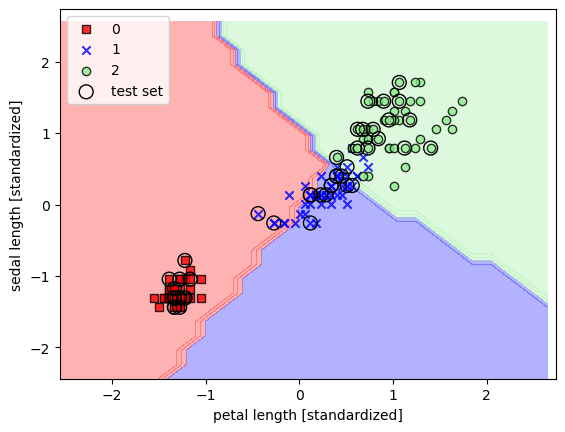

In [155]:
X_conbined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_conbined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('sedal length [standardized]')
plt.legend(loc='upper left')
plt.show()